<a href="https://colab.research.google.com/github/georgezoto/Deep-Learning-with-PyTorch/blob/master/Introduction-to-PyTorch/4_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount Google Drive for images and datasets ##

Using Colab, we need to mount our Google Drive in our virtual machine using an authorization code to access our images and train and test datasets.

- https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

google_drive_path = '/content/gdrive/My Drive/+Colab Notebooks/Deep-Learning-with-PyTorch/Introduction-to-PyTorch'

import sys
sys.path.append(google_drive_path)

# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src="https://docs.google.com/uc?export=download&id=17Tq56pA4TBq1qxcNebxg7rAQNYU29qpD" style="width:400px;height:300px;">

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [0]:
import torch
from torchvision import datasets, transforms
import helper

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

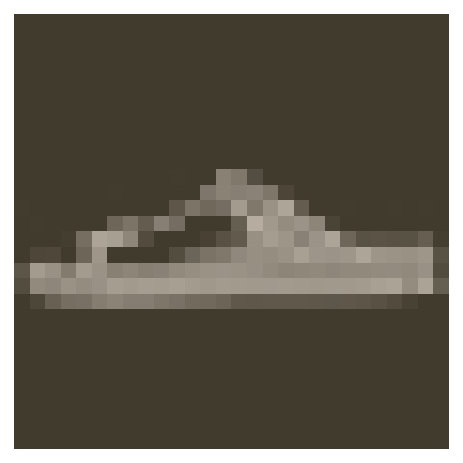

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);



```
# This is formatted as code
```

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [0]:
# TODO: Define your network architecture here
from torch import nn, optim
import math

#Model architectures
model_784_128_64_10 = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

In [5]:
model = model_784_128_64_10
model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)

In [0]:
#Loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()

#Optimizer updates the weights using their gradients
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [7]:
#Train the network
epochs = 3
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        # Clear the gradients, since gradients are accumulated!!!
        optimizer.zero_grad()

        # Forward pass, then backward pass, then update weights
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        
        # Take an update step for the weights
        optimizer.step()

        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.0309459771682967
Training loss: 0.5621143999193777
Training loss: 0.4945642895249924


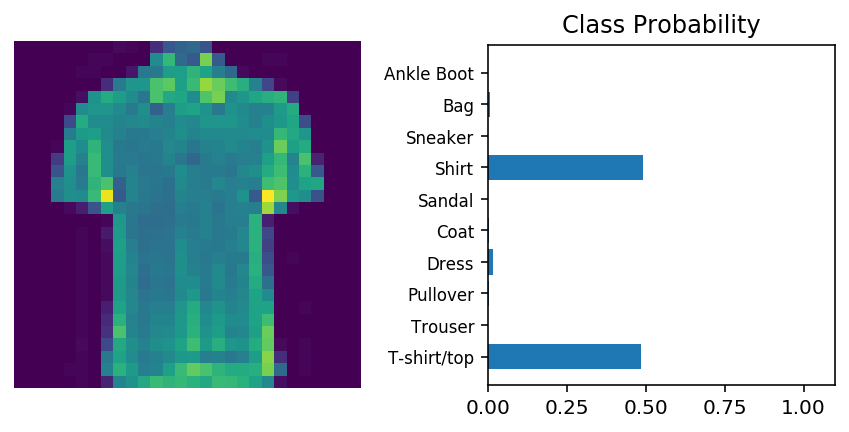

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img

# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

In [9]:
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [10]:
trainloader.dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /root/.pytorch/F_MNIST_data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [11]:
testloader.dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /root/.pytorch/F_MNIST_data/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

## Explore different network architectures

In [0]:
# https://discuss.pytorch.org/t/a-more-elegant-way-of-creating-the-nets-in-pytorch/11959/2
# https://pytorch.org/docs/stable/nn.html#torch.nn.Module.add_module
# https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
# https://github.com/zalandoresearch/fashion-mnist

class sequential_model(nn.Sequential):

    def __init__(self, input_size = 784, output_size=10, hidden_layers=2, hidden_size=128, hidden_act='ReLU', output_act='LogSoftmax'):

        if not math.log(hidden_size, 2).is_integer():
          print('⚠️hidden_size needs to be a power of 2 ⚠️')
          return None

        if hidden_size < math.pow(2, hidden_layers):
          print('⚠️hidden_size needs to be a power of 2 and larger then %d ⚠️' % int(math.pow(2, hidden_layers)))
          return None
      
        super().__init__()

        if hidden_act == 'ReLU':
          act_text, activation = "ReLU", nn.ReLU()
        else:
          act_text, activation = "Sigmoid", nn.Sigmoid()

        if output_act == 'LogSoftmax':
          output_act_text, output_activation = "LogSoftmax", nn.LogSoftmax(dim=1)
        else:
          output_act_text, output_activation = "None", None

        for layer in range(hidden_layers+1):
          if layer == 0:
            self.add_module("Layer"+str(layer+1), nn.Linear(input_size, hidden_size))
            self.add_module(act_text+str(layer+1), activation)

          elif layer == hidden_layers:
            self.add_module("Layer"+str(layer+1), nn.Linear(hidden_size*2, output_size))
            if output_activation:
              self.add_module("LogSoftmax"+str(layer+1), output_activation)

          else:
            self.add_module("Layer"+str(layer+1), nn.Linear(hidden_size*2, hidden_size))
            self.add_module(act_text+str(layer+1), activation)

          hidden_size = int(hidden_size/2)


    def forward(self, V):
        return super().forward(V).squeeze() 


    def train_model(self, criterion='NLLLoss', optimizer='SGD', learning_rate=0.01, epochs=3, train_data=trainloader):
      #Loss function
      #criterion = nn.CrossEntropyLoss()
      criterion = nn.NLLLoss()

      #Optimizer updates the weights using their gradients
      if optimizer == 'SGD':
        optimizer = optim.SGD(self.parameters(), lr=learning_rate)
      else:
        optimizer = optim.Adam(self.parameters(), lr=learning_rate)

      #Train the network
      #epochs = 3

      train_losses, test_losses, accuracy_list = [], [], []
      for e in range(epochs):
          running_loss = 0
          test_loss = 0

          for images, labels in train_data:
              # Flatten MNIST images into a 784 long vector
              images = images.view(images.shape[0], -1)

              # Clear the gradients, since gradients are accumulated!!!
              optimizer.zero_grad()

              # Forward pass, then backward pass, then update weights
              output = self(images)
              loss = criterion(output, labels)
              loss.backward()
              
              # Take an update step for the weights
              optimizer.step()

              running_loss += loss.item()
          else:
              ## Validation pass and print out train and test loss and accuracy
              test_loss = 0
              accuracy = 0

              # Turn off gradients, we're not updating our parameters in the validation pass
              with torch.no_grad():

                # set model to evaluation mode
                self.eval()

                # validation pass here
                for images, labels in testloader:
                  # Convert 2D image to 1D vector
                  images = images.view(images.shape[0], -1)
                  
                  log_ps = self(images)
                  test_loss += criterion(log_ps, labels)
                  
                  ps = torch.exp(log_ps)
                  top_p, top_class = ps.topk(1, dim=1)
                  equals = top_class== labels.view(*top_class.shape)        
                  
                  accuracy += torch.mean(equals.type(torch.FloatTensor))
          
              # set model back to train mode
              self.train()     

              train_losses.append(running_loss/len(trainloader))
              test_losses.append(test_loss/len(testloader))
              accuracy_list.append(accuracy/len(testloader))

              print("Epoch: {}/{} ".format(e+1, epochs),
                    "Training Loss: {:.3f} ".format(running_loss/len(trainloader)),
                    "Test Loss: {:.3f} ".format(test_loss/len(testloader)),
                    "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))


      #Plot train and test losses and accuracy
      self.plot_train_test_loss_accuracy(train_losses, test_losses, accuracy_list)


    def plot_train_test_loss_accuracy(self, train_losses, test_losses, accuracy_list):
      fig, ax1 = plt.subplots(figsize=(12,7))

      ax1.plot(train_losses, label='Training loss')
      ax1.plot(test_losses, label='Validation loss')
      ax1.set_xlabel('Epoch')
      ax1.set_ylabel('Training and Validation Loss', color='blue')
      ax1.legend(frameon=False)

      ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
      ax2.plot(accuracy_list, label='Accuracy', color='green')
      ax2.set_ylabel('Accuracy', color='green')
      ax2.legend(frameon=False)

      fig.tight_layout()  # otherwise the right y-label is slightly clipped
      plt.show()   


    def test_model(self, test_data=testloader):
      dataiter = iter(test_data)
      images, labels = dataiter.next()
      img = images[0]
      # Convert 2D image to 1D vector
      #img = img.resize_(1, 784)
      img = img.view(img.shape[0], -1)

      # Turn off gradients to speed up this part
      with torch.no_grad():
          logps = self(img)

      # Output of the network are log-probabilities, need to take exponential for probabilities
      ps = torch.exp(logps)

      # Plot the image and probabilities
      helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

    # https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
    # Network performance on the whole dataset
    def test_model_accuracy(self, test_data=testloader):
      correct = 0
      total = 0
      accuracy = 0

      # Turn off gradients to speed up this part
      with torch.no_grad():
          for images, labels in test_data:
              # Convert 2D image to 1D vector
              #img = images.resize_(1, 784)
              img = images.view(images.shape[0], -1)

              #logps = self(img)
              #print('logps', logps, logps.sum())
              # Output of the network are log-probabilities, need to take exponential for probabilities
              #output = torch.exp(logps)

              log_ps = self(img)
              ps = torch.exp(log_ps)
              
              #_, predicted = torch.max(output.data, 0)
              top_p, top_class = ps.topk(1, dim=1)
              #correct += (predicted == labels).sum().item()
              equals = top_class== labels.view(*top_class.shape)

              total += labels.size(0)
              correct += equals.sum().item()

              accuracy += torch.mean(equals.type(torch.FloatTensor))

      print('Accuracy of the network on the test images is %d / %d or %d%%' % (correct, total, (100 * correct / total)))


    # What are the classes that performed well, and the classes that did not perform well
    def test_model_accuracy_details(self, test_data=testloader):
      classes = ('0 T-shirt/top', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot')

      class_correct = list(0. for i in range(10))
      class_total = list(0. for i in range(10))

      with torch.no_grad():
          for images, labels in test_data:
              # Convert 2D image to 1D vector
              #img = images.resize_(1, 784)
              img = images.view(images.shape[0], -1)

              log_ps = self(img)
              ps = torch.exp(log_ps)

              #_, predicted = torch.max(output, 0)
              #c = (predicted == labels).squeeze()

              top_p, top_class = ps.topk(1, dim=1)
              equals = top_class== labels.view(*top_class.shape)

              for i in range(4):
                  label = labels[i]
                  class_correct[label] += equals[i].item()
                  class_total[label] += 1


      for i in range(10):
          print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

## Model 1
## input_size = 784, output_size=10, hidden_layers=3, hidden_size=128 hidden_act='ReLU', output_act='LogSoftmax'

## criterion='NLLLoss', optimizer='SGD', learning_rate=0.01, epochs=10

In [13]:
model = sequential_model(input_size = 784, output_size=10, hidden_layers=3, hidden_size=128, hidden_act='ReLU', output_act='LogSoftmax')
print(model)

sequential_model(
  (Layer1): Linear(in_features=784, out_features=128, bias=True)
  (ReLU1): ReLU()
  (Layer2): Linear(in_features=128, out_features=64, bias=True)
  (ReLU2): ReLU()
  (Layer3): Linear(in_features=64, out_features=32, bias=True)
  (ReLU3): ReLU()
  (Layer4): Linear(in_features=32, out_features=10, bias=True)
  (LogSoftmax4): LogSoftmax()
)


Epoch: 1/10  Training Loss: 0.488  Test Loss: 0.503  Test Accuracy: 0.814
Epoch: 2/10  Training Loss: 0.457  Test Loss: 0.477  Test Accuracy: 0.825
Epoch: 3/10  Training Loss: 0.432  Test Loss: 0.452  Test Accuracy: 0.837
Epoch: 4/10  Training Loss: 0.413  Test Loss: 0.447  Test Accuracy: 0.838
Epoch: 5/10  Training Loss: 0.397  Test Loss: 0.426  Test Accuracy: 0.846
Epoch: 6/10  Training Loss: 0.386  Test Loss: 0.410  Test Accuracy: 0.851
Epoch: 7/10  Training Loss: 0.374  Test Loss: 0.412  Test Accuracy: 0.851
Epoch: 8/10  Training Loss: 0.363  Test Loss: 0.404  Test Accuracy: 0.852
Epoch: 9/10  Training Loss: 0.354  Test Loss: 0.430  Test Accuracy: 0.840
Epoch: 10/10  Training Loss: 0.347  Test Loss: 0.398  Test Accuracy: 0.855


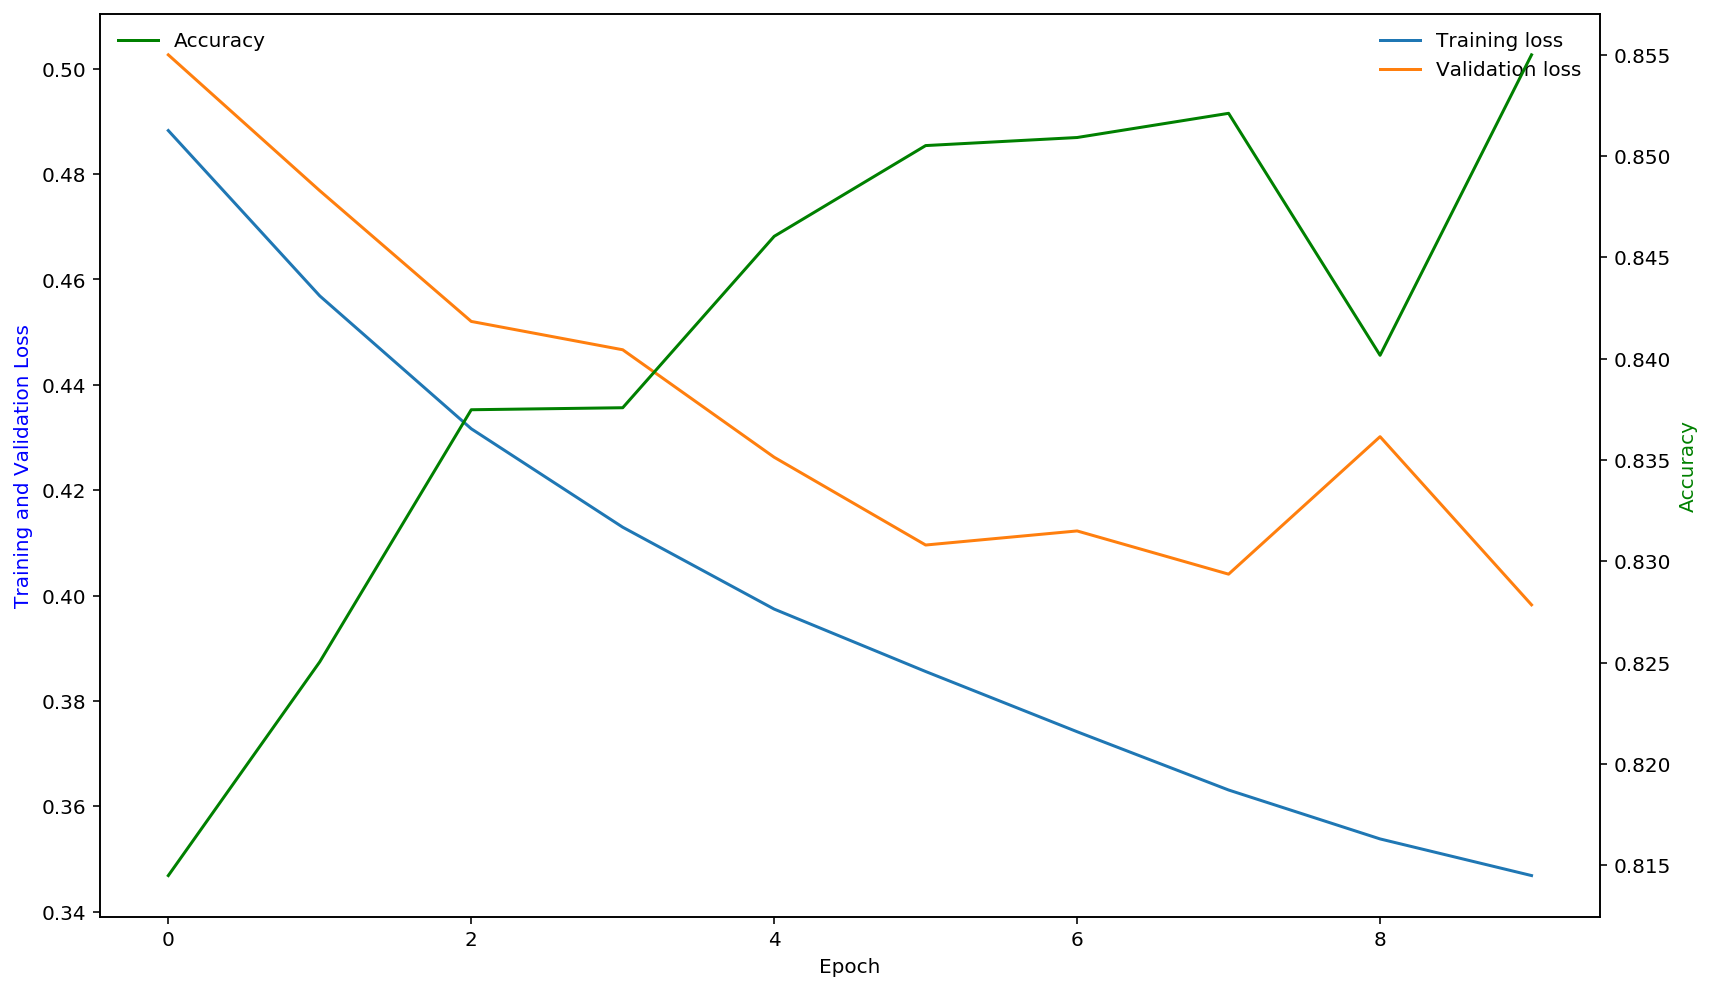

In [18]:
model.train_model(criterion='NLLLoss', optimizer='SGD', learning_rate=0.01, epochs=10, train_data=trainloader)

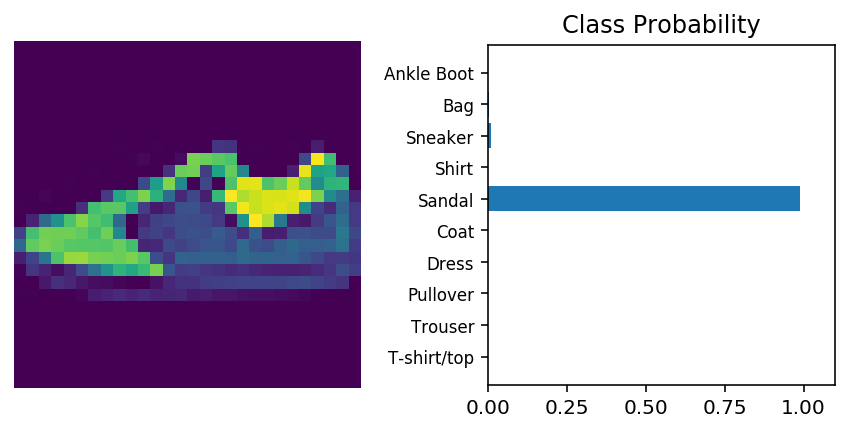

In [19]:
model.test_model(test_data=testloader)

In [20]:
model.test_model_accuracy(test_data=testloader)

Accuracy of the network on the test images is 8546 / 10000 or 85%


In [21]:
model.test_model_accuracy_details(test_data=testloader)

Accuracy of 0 T-shirt/top : 85 %
Accuracy of 1 Trouser : 92 %
Accuracy of 2 Pullover : 84 %
Accuracy of 3 Dress : 89 %
Accuracy of 4 Coat : 71 %
Accuracy of 5 Sandal : 100 %
Accuracy of 6 Shirt : 50 %
Accuracy of 7 Sneaker : 82 %
Accuracy of 8 Bag : 94 %
Accuracy of 9 Ankle boot : 98 %


## Model 2 - optimizer='Adam'

## input_size = 784, output_size=10, hidden_layers=3, hidden_size=128 hidden_act='ReLU', output_act='LogSoftmax'

## criterion='NLLLoss', optimizer='Adam', learning_rate=0.01, epochs=10

Epoch: 1/10  Training Loss: 0.577  Test Loss: 0.505  Test Accuracy: 0.817
Epoch: 2/10  Training Loss: 0.449  Test Loss: 0.492  Test Accuracy: 0.824
Epoch: 3/10  Training Loss: 0.425  Test Loss: 0.449  Test Accuracy: 0.838
Epoch: 4/10  Training Loss: 0.409  Test Loss: 0.435  Test Accuracy: 0.845
Epoch: 5/10  Training Loss: 0.404  Test Loss: 0.444  Test Accuracy: 0.848
Epoch: 6/10  Training Loss: 0.397  Test Loss: 0.474  Test Accuracy: 0.838
Epoch: 7/10  Training Loss: 0.393  Test Loss: 0.440  Test Accuracy: 0.847
Epoch: 8/10  Training Loss: 0.386  Test Loss: 0.492  Test Accuracy: 0.844
Epoch: 9/10  Training Loss: 0.397  Test Loss: 0.451  Test Accuracy: 0.845
Epoch: 10/10  Training Loss: 0.382  Test Loss: 0.455  Test Accuracy: 0.845


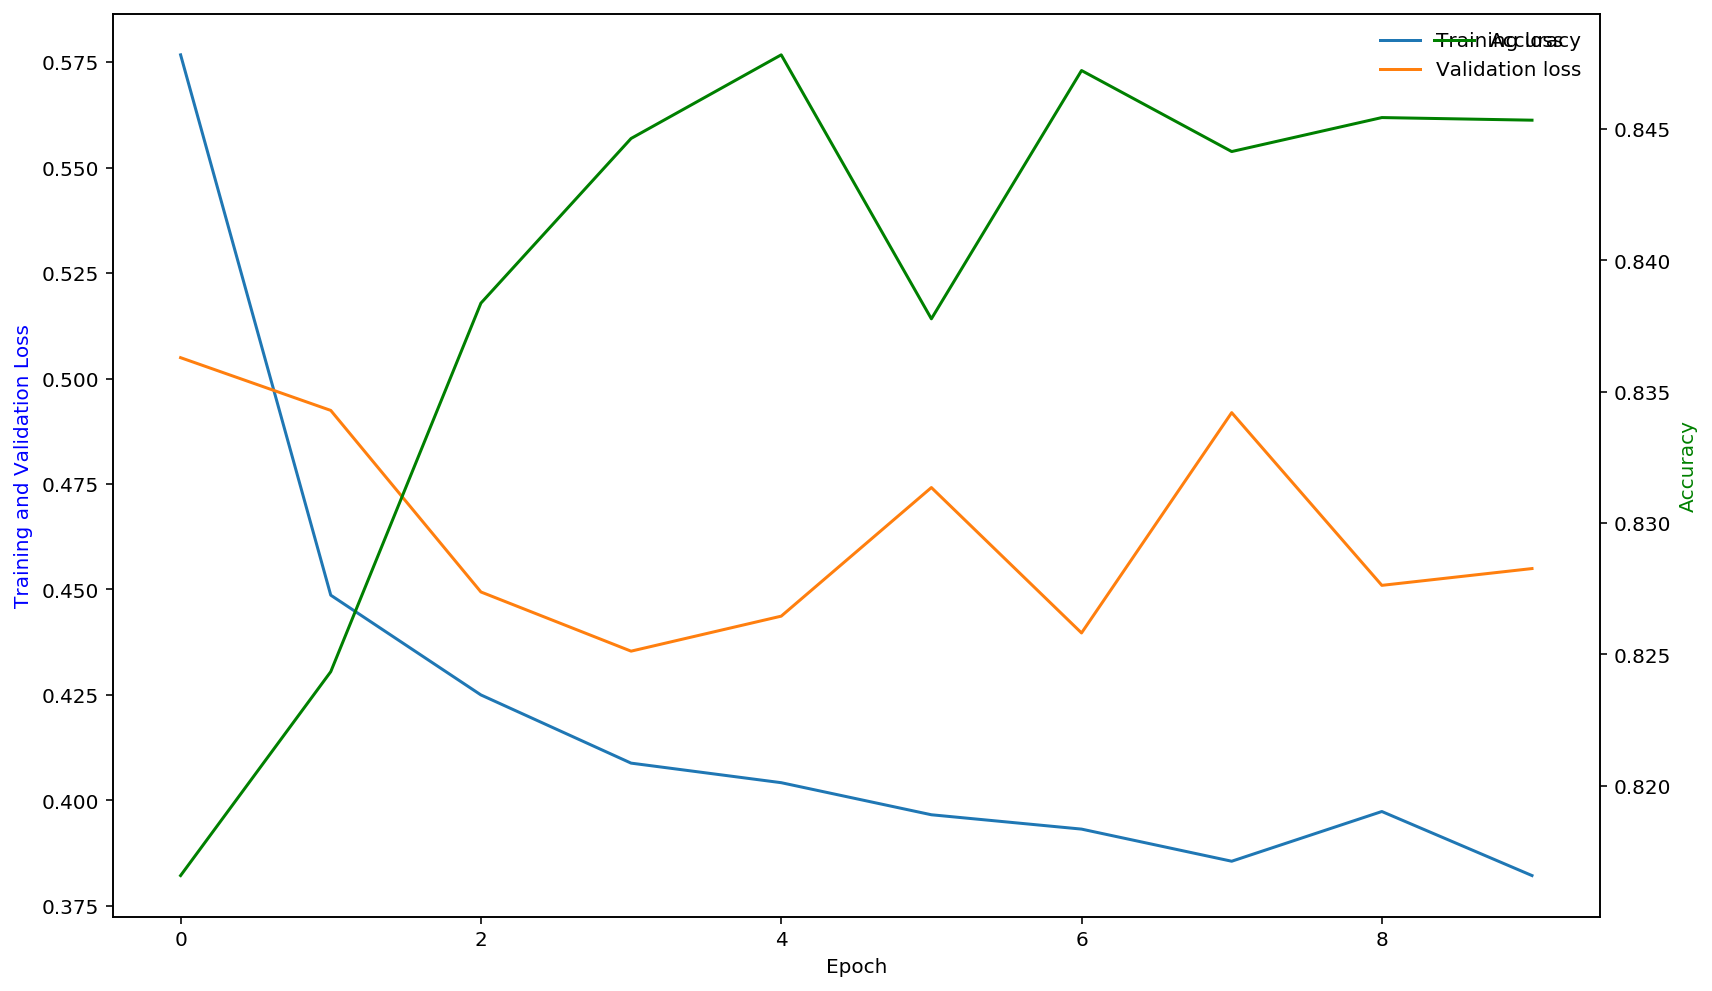

In [22]:
model.train_model(criterion='NLLLoss', optimizer='Adam', learning_rate=0.01, epochs=10, train_data=trainloader)

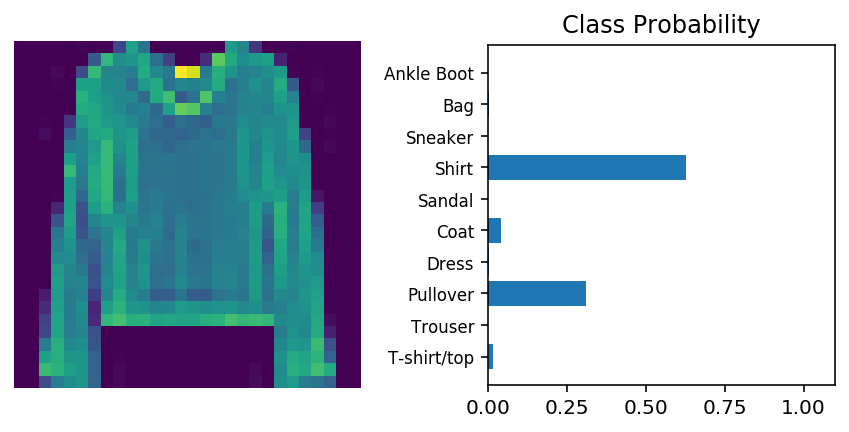

In [23]:
model.test_model(test_data=testloader)

In [24]:
model.test_model_accuracy(test_data=testloader)

Accuracy of the network on the test images is 8452 / 10000 or 84%


In [25]:
model.test_model_accuracy_details(test_data=testloader)

Accuracy of 0 T-shirt/top : 85 %
Accuracy of 1 Trouser : 97 %
Accuracy of 2 Pullover : 85 %
Accuracy of 3 Dress : 89 %
Accuracy of 4 Coat : 74 %
Accuracy of 5 Sandal : 90 %
Accuracy of 6 Shirt : 60 %
Accuracy of 7 Sneaker : 100 %
Accuracy of 8 Bag : 100 %
Accuracy of 9 Ankle boot : 81 %


## Model 3 - hidden_layers=5, hidden_size=64

## input_size = 784, output_size=10, hidden_layers=5, hidden_size=64, hidden_act='ReLU', output_act='LogSoftmax'

## criterion='NLLLoss', optimizer='SGD', learning_rate=0.01, epochs=10

In [26]:
model = sequential_model(input_size = 784, output_size=10, hidden_layers=5, hidden_size=64, hidden_act='ReLU', output_act='LogSoftmax')
print(model)

sequential_model(
  (Layer1): Linear(in_features=784, out_features=64, bias=True)
  (ReLU1): ReLU()
  (Layer2): Linear(in_features=64, out_features=32, bias=True)
  (ReLU2): ReLU()
  (Layer3): Linear(in_features=32, out_features=16, bias=True)
  (ReLU3): ReLU()
  (Layer4): Linear(in_features=16, out_features=8, bias=True)
  (ReLU4): ReLU()
  (Layer5): Linear(in_features=8, out_features=4, bias=True)
  (ReLU5): ReLU()
  (Layer6): Linear(in_features=4, out_features=10, bias=True)
  (LogSoftmax6): LogSoftmax()
)


Epoch: 1/10  Training Loss: 2.315  Test Loss: 2.287  Test Accuracy: 0.181
Epoch: 2/10  Training Loss: 2.032  Test Loss: 1.784  Test Accuracy: 0.264
Epoch: 3/10  Training Loss: 1.552  Test Loss: 1.269  Test Accuracy: 0.446
Epoch: 4/10  Training Loss: 1.125  Test Loss: 1.107  Test Accuracy: 0.555
Epoch: 5/10  Training Loss: 0.933  Test Loss: 0.887  Test Accuracy: 0.679
Epoch: 6/10  Training Loss: 0.814  Test Loss: 0.786  Test Accuracy: 0.710
Epoch: 7/10  Training Loss: 0.727  Test Loss: 0.702  Test Accuracy: 0.729
Epoch: 8/10  Training Loss: 0.660  Test Loss: 0.678  Test Accuracy: 0.776
Epoch: 9/10  Training Loss: 0.611  Test Loss: 0.670  Test Accuracy: 0.742
Epoch: 10/10  Training Loss: 0.578  Test Loss: 0.816  Test Accuracy: 0.715


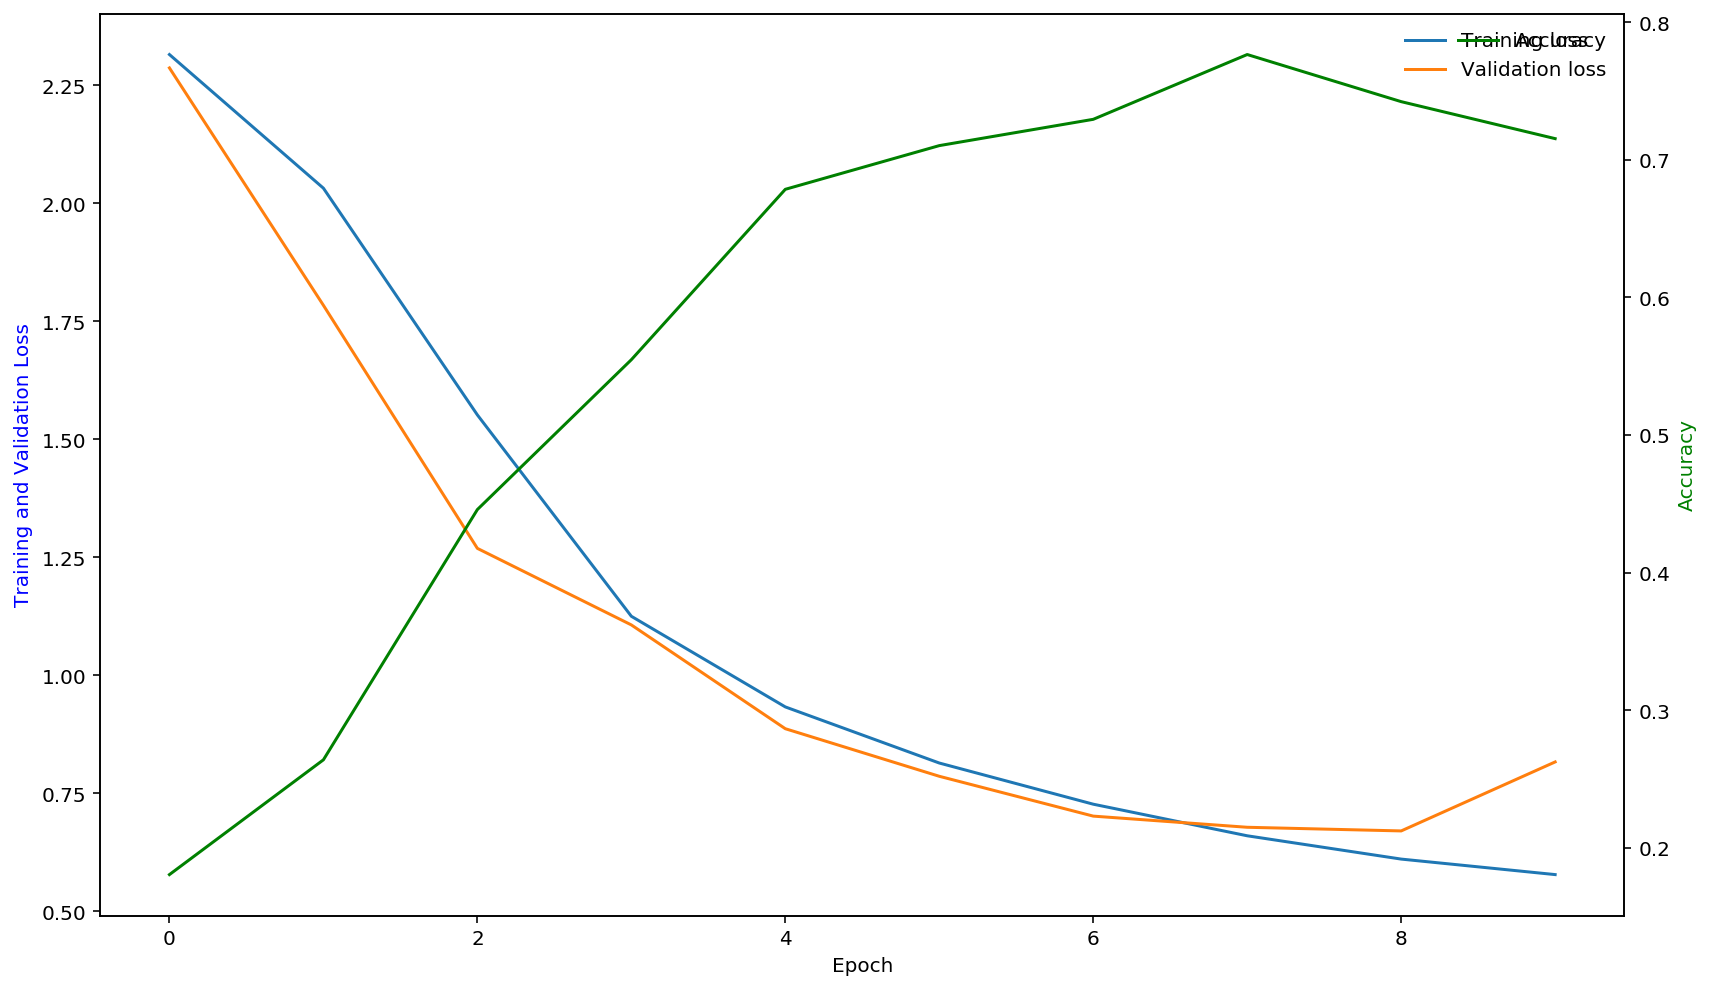

In [27]:
model.train_model(criterion='NLLLoss', optimizer='SGD', learning_rate=0.01, epochs=10, train_data=trainloader)

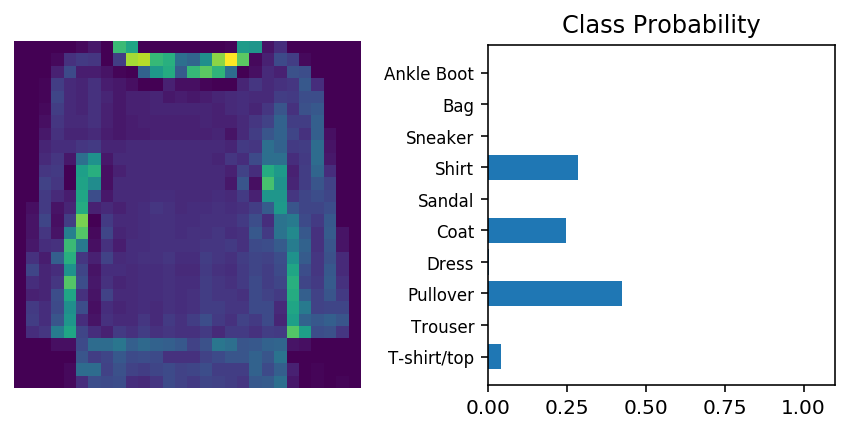

In [28]:
model.test_model(test_data=testloader)

In [29]:
model.test_model_accuracy(test_data=testloader)

Accuracy of the network on the test images is 7164 / 10000 or 71%


In [30]:
model.test_model_accuracy_details(test_data=testloader)

Accuracy of 0 T-shirt/top : 33 %
Accuracy of 1 Trouser : 89 %
Accuracy of 2 Pullover : 84 %
Accuracy of 3 Dress : 55 %
Accuracy of 4 Coat : 63 %
Accuracy of 5 Sandal : 37 %
Accuracy of 6 Shirt : 48 %
Accuracy of 7 Sneaker : 98 %
Accuracy of 8 Bag : 96 %
Accuracy of 9 Ankle boot : 94 %


## Model 4 - learning_rate=0.1, epochs=20

## input_size = 784, output_size=10, hidden_layers=5, hidden_size=64, hidden_act='ReLU', output_act='LogSoftmax'

## criterion='NLLLoss', optimizer='SGD', learning_rate=0.1, epochs=20

Epoch: 1/20  Training Loss: 1.812  Test Loss: 0.973  Test Accuracy: 0.612
Epoch: 2/20  Training Loss: 0.985  Test Loss: 1.089  Test Accuracy: 0.664
Epoch: 3/20  Training Loss: 0.699  Test Loss: 0.625  Test Accuracy: 0.795
Epoch: 4/20  Training Loss: 0.602  Test Loss: 0.755  Test Accuracy: 0.733
Epoch: 5/20  Training Loss: 0.550  Test Loss: 0.709  Test Accuracy: 0.745
Epoch: 6/20  Training Loss: 0.524  Test Loss: 0.611  Test Accuracy: 0.787
Epoch: 7/20  Training Loss: 0.494  Test Loss: 0.572  Test Accuracy: 0.810
Epoch: 8/20  Training Loss: 0.476  Test Loss: 0.560  Test Accuracy: 0.828
Epoch: 9/20  Training Loss: 0.492  Test Loss: 0.644  Test Accuracy: 0.781
Epoch: 10/20  Training Loss: 0.447  Test Loss: 0.497  Test Accuracy: 0.833
Epoch: 11/20  Training Loss: 0.435  Test Loss: 0.526  Test Accuracy: 0.843
Epoch: 12/20  Training Loss: 0.421  Test Loss: 0.494  Test Accuracy: 0.840
Epoch: 13/20  Training Loss: 0.411  Test Loss: 0.482  Test Accuracy: 0.841
Epoch: 14/20  Training Loss: 0.402

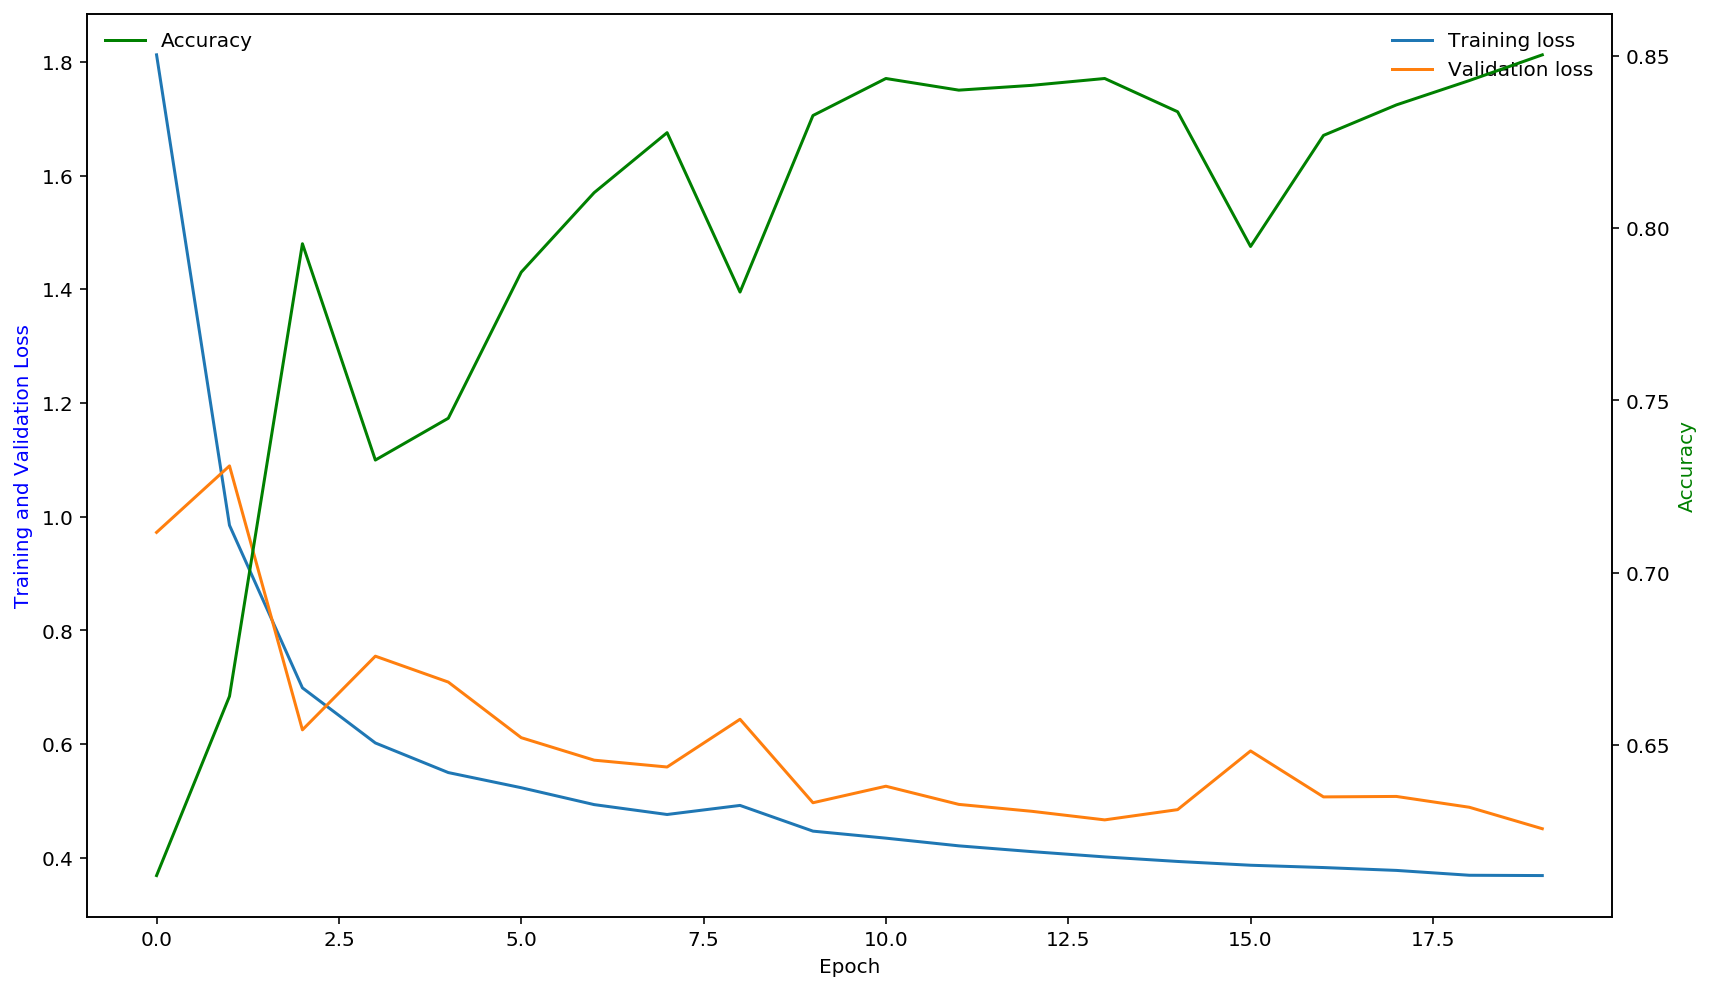

In [31]:
model.train_model(criterion='NLLLoss', optimizer='SGD', learning_rate=0.1, epochs=20, train_data=trainloader)

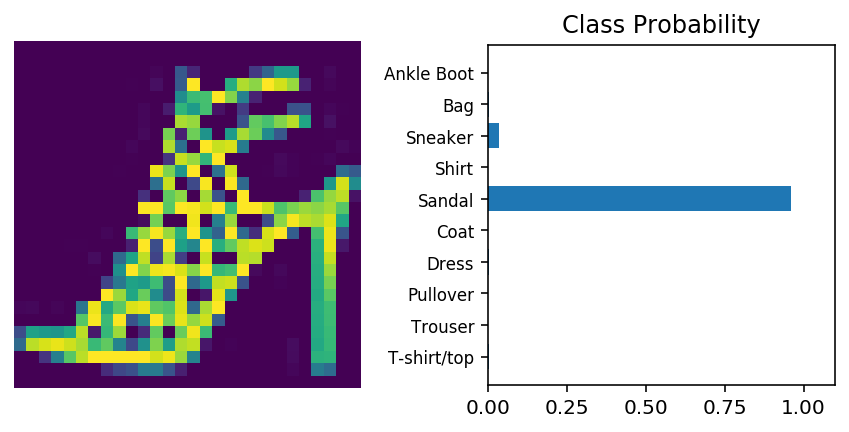

In [32]:
model.test_model(test_data=testloader)

In [33]:
model.test_model_accuracy(test_data=testloader)

Accuracy of the network on the test images is 8502 / 10000 or 85%


In [34]:
model.test_model_accuracy_details(test_data=testloader)

Accuracy of 0 T-shirt/top : 76 %
Accuracy of 1 Trouser : 100 %
Accuracy of 2 Pullover : 77 %
Accuracy of 3 Dress : 86 %
Accuracy of 4 Coat : 85 %
Accuracy of 5 Sandal : 96 %
Accuracy of 6 Shirt : 58 %
Accuracy of 7 Sneaker : 96 %
Accuracy of 8 Bag : 92 %
Accuracy of 9 Ankle boot : 81 %


## Model 5 - hidden_layers=3, hidden_size=256, learning_rate=0.01

## input_size = 784, output_size=10, hidden_layers=3, hidden_size=256, hidden_act='ReLU', output_act='LogSoftmax'

## criterion='NLLLoss', optimizer='SGD', learning_rate=0.01, epochs=10

In [35]:
model = sequential_model(input_size = 784, output_size=10, hidden_layers=3, hidden_size=256, hidden_act='ReLU', output_act='LogSoftmax')
print(model)

sequential_model(
  (Layer1): Linear(in_features=784, out_features=256, bias=True)
  (ReLU1): ReLU()
  (Layer2): Linear(in_features=256, out_features=128, bias=True)
  (ReLU2): ReLU()
  (Layer3): Linear(in_features=128, out_features=64, bias=True)
  (ReLU3): ReLU()
  (Layer4): Linear(in_features=64, out_features=10, bias=True)
  (LogSoftmax4): LogSoftmax()
)


Epoch: 1/10  Training Loss: 1.302  Test Loss: 0.739  Test Accuracy: 0.719
Epoch: 2/10  Training Loss: 0.604  Test Loss: 0.567  Test Accuracy: 0.793
Epoch: 3/10  Training Loss: 0.513  Test Loss: 0.518  Test Accuracy: 0.812
Epoch: 4/10  Training Loss: 0.467  Test Loss: 0.484  Test Accuracy: 0.827
Epoch: 5/10  Training Loss: 0.438  Test Loss: 0.455  Test Accuracy: 0.836
Epoch: 6/10  Training Loss: 0.417  Test Loss: 0.456  Test Accuracy: 0.837
Epoch: 7/10  Training Loss: 0.400  Test Loss: 0.442  Test Accuracy: 0.841
Epoch: 8/10  Training Loss: 0.385  Test Loss: 0.426  Test Accuracy: 0.845
Epoch: 9/10  Training Loss: 0.372  Test Loss: 0.421  Test Accuracy: 0.850
Epoch: 10/10  Training Loss: 0.362  Test Loss: 0.398  Test Accuracy: 0.857


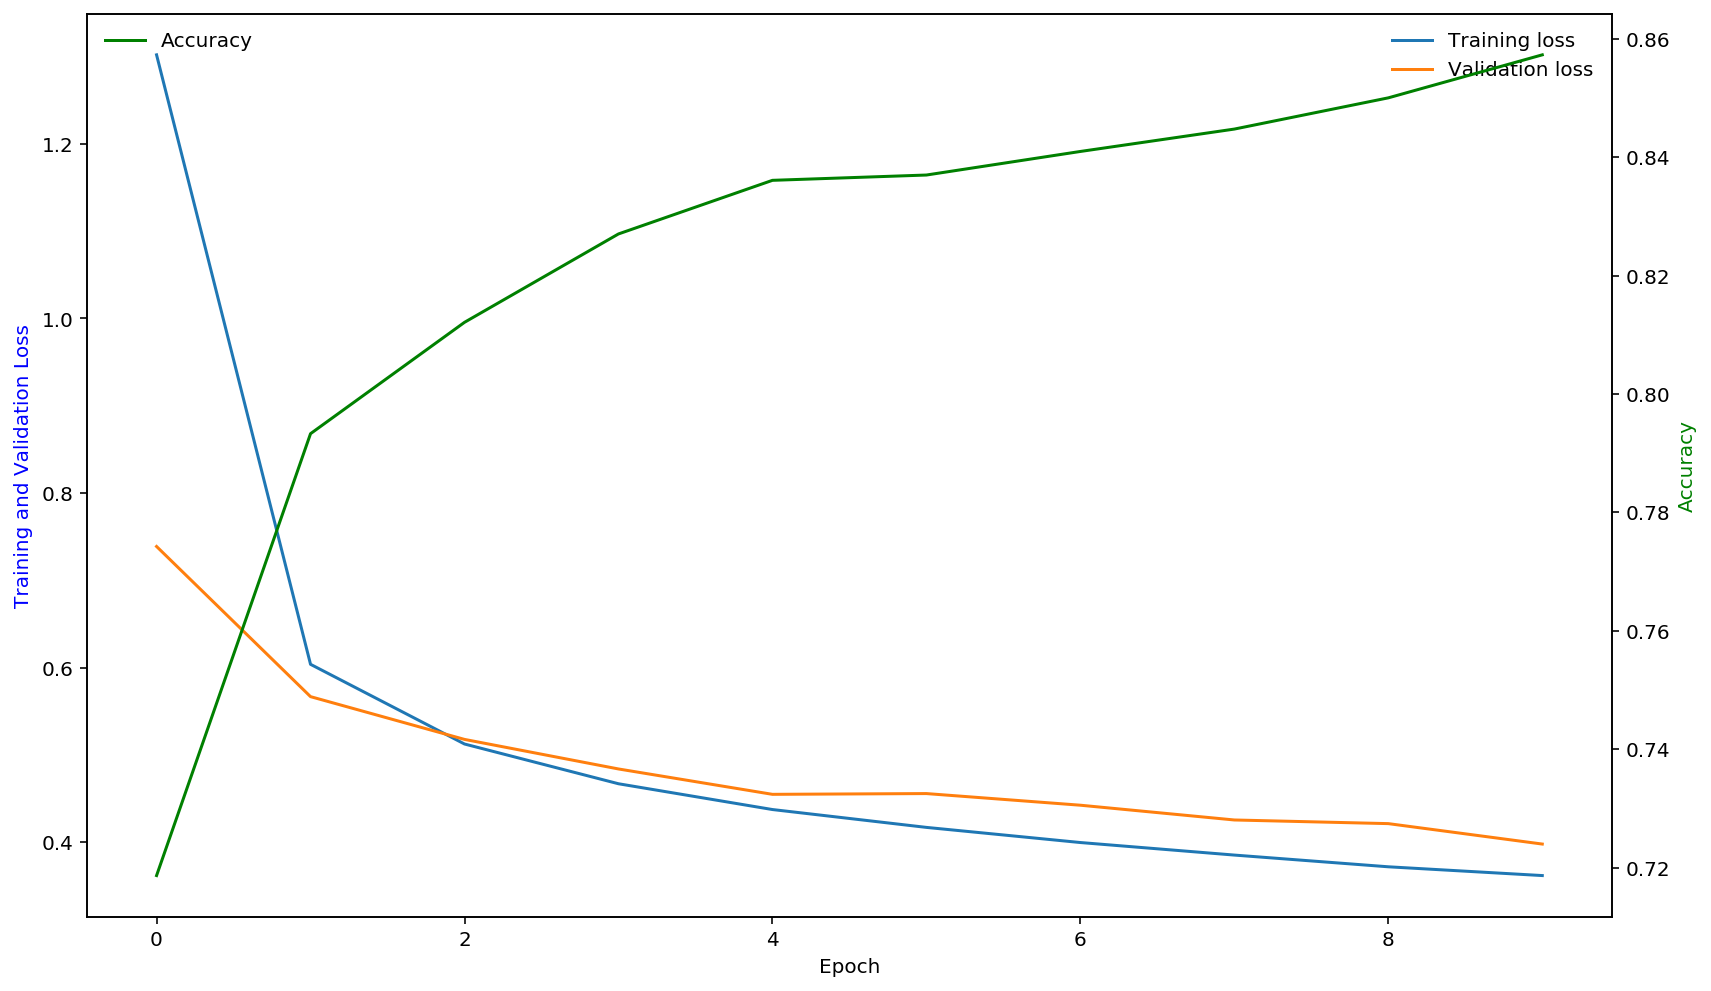

In [36]:
model.train_model(criterion='NLLLoss', optimizer='SGD', learning_rate=0.01, epochs=10, train_data=trainloader)

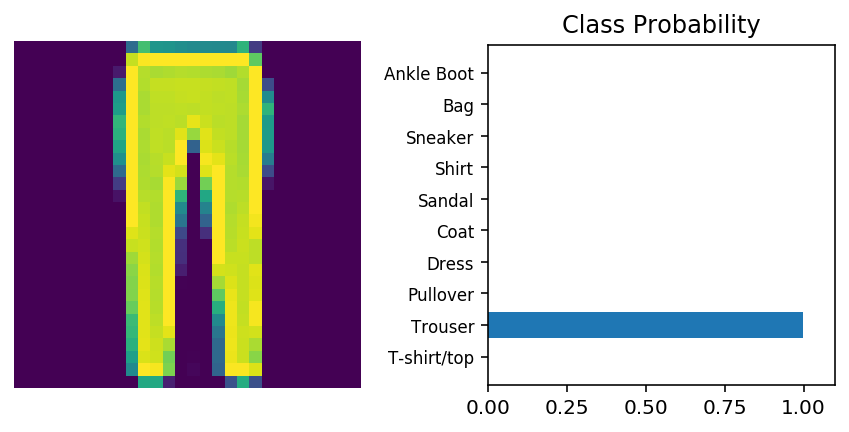

In [37]:
model.test_model(test_data=testloader)

In [38]:
model.test_model_accuracy(test_data=testloader)

Accuracy of the network on the test images is 8575 / 10000 or 85%


In [39]:
model.test_model_accuracy_details(test_data=testloader)

Accuracy of 0 T-shirt/top : 88 %
Accuracy of 1 Trouser : 89 %
Accuracy of 2 Pullover : 71 %
Accuracy of 3 Dress : 89 %
Accuracy of 4 Coat : 78 %
Accuracy of 5 Sandal : 96 %
Accuracy of 6 Shirt : 59 %
Accuracy of 7 Sneaker : 91 %
Accuracy of 8 Bag : 98 %
Accuracy of 9 Ankle boot : 100 %


## Building the network using torch.nn.Module and torch.nn.functional

In [0]:
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

## Create the network, define the criterion and optimizer

In [0]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

## Train the network

In [42]:
epochs = 10

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5122352358914896
Training loss: 0.3907785030093783
Training loss: 0.35676507996534235
Training loss: 0.33096597435028313
Training loss: 0.3174563139073376
Training loss: 0.2997883709429551
Training loss: 0.2922036913729934
Training loss: 0.27945795846678045
Training loss: 0.2725268797293655
Training loss: 0.26533116946723667


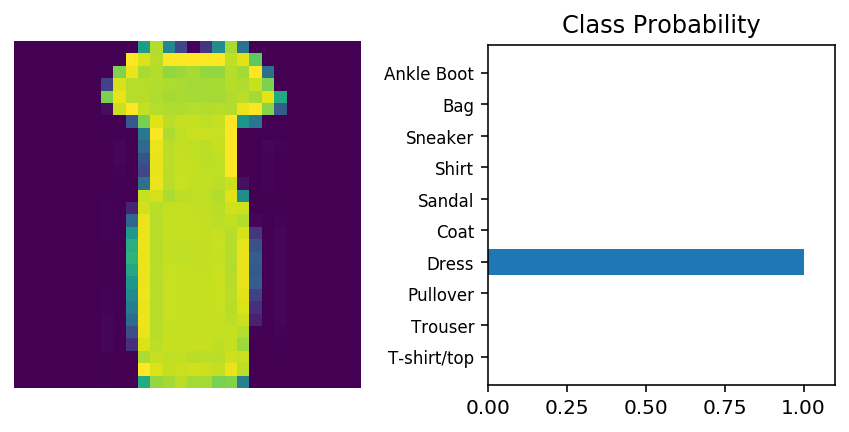

In [43]:
# Test out the network!
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')